Practice Project - 5
## Titanic Project

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.

### Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [23]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Checking for the shape
df.shape

(891, 12)

In [26]:
df.drop('PassengerId',axis=1,inplace=True)

In [27]:
df.drop('Name',axis=1,inplace=True)

In [28]:
df.drop('SibSp',axis=1,inplace=True)

In [ ]:
df.drop('Ticket',axis=1,inplace=True)

In [31]:
df.drop('Cabin',axis=1,inplace=True)

In [32]:
df

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,NaN,2,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [33]:
# Checking for the null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [34]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Parch         0
Fare          0
Embarked      2
dtype: int64

We have 177 null values in Age column


In [35]:
# filling NA Values
df["Age"]=df["Age"].fillna((df["Age"].median()))

In [36]:
df.head(4)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S


## EDA

### Correlation

In [38]:
corr=df.corr()

<AxesSubplot:>

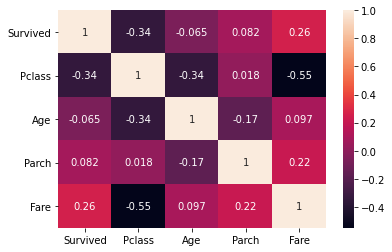

In [41]:
import seaborn as sns
sns.heatmap(corr,annot=True)

In [43]:
#pclass has low correlational value tjus can be ignored
df.drop('Pclass',axis=1,inplace=True)

In [44]:
df

,Survived,Sex,Age,Parch,Fare,Embarked
0,0,male,22.0,0,7.2500,S
1,1,female,38.0,0,71.2833,C
2,1,female,26.0,0,7.9250,S
3,1,female,35.0,0,53.1000,S
4,0,male,35.0,0,8.0500,S
...,...,...,...,...,...,...
886,0,male,27.0,0,13.0000,S
887,1,female,19.0,0,30.0000,S
888,0,female,28.0,2,23.4500,S
889,1,male,26.0,0,30.0000,C


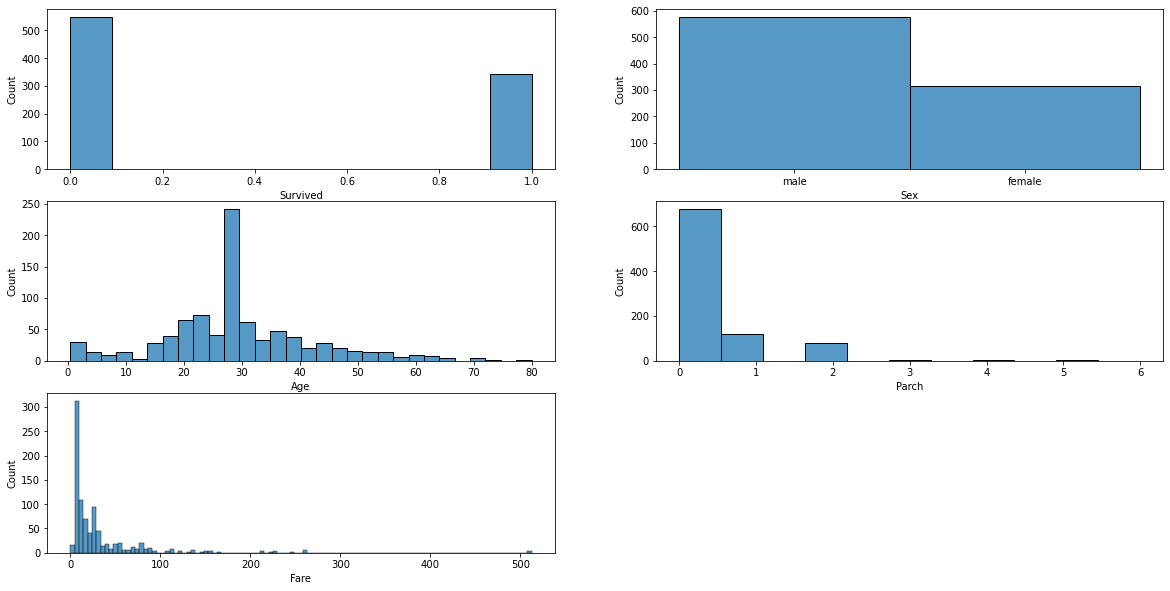

In [46]:
# Looking at the data distribution for each column
import seaborn as sns
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.show()
    

In [47]:
df.drop('Parch',axis=1,inplace=True)

In [48]:
df.drop('Fare',axis=1,inplace=True)

In [49]:
df.drop('Embarked',axis=1,inplace=True)

Thus we remain with below features for furthere analysis

In [50]:
df.columns

Index(['Survived', 'Sex', 'Age'], dtype='object')

In [52]:
# Handling categorical variable "Sex"
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform (df["Sex"])
df['Sex'] 

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [53]:
df.head(2)

,Survived,Sex,Age
0,0,1,22.0
1,1,0,38.0


In [54]:
#1 is for male & 0 for female

In [57]:
df.describe()

,Survived,Sex,Age
count,891.000000,891.000000,891.000000
mean,0.383838,0.647587,29.361582
std,0.486592,0.477990,13.019697
min,0.000000,0.000000,0.420000
25%,0.000000,0.000000,22.000000
50%,0.000000,1.000000,28.000000
75%,1.000000,1.000000,35.000000
max,1.000000,1.000000,80.000000


In [58]:
# Handling Outliers

<AxesSubplot:>

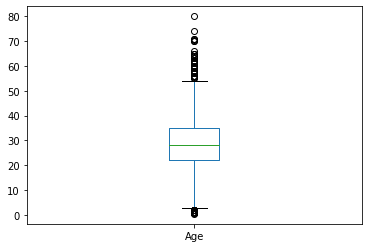

In [63]:
df['Age'].plot(kind='box')

There are many outliers in age column

In [64]:
# Removing the outliers using z score method
from scipy.stats import zscore

In [65]:
z=np.abs(zscore(df))

In [66]:
print(np.where(z>3))

(array([ 96, 116, 493, 630, 672, 745, 851], dtype=int64), array([2, 2, 2, 2, 2, 2, 2], dtype=int64))


In [67]:
df_z1 =df[(z<3).all(axis=1)]

In [68]:
df_z1.shape

(884, 3)

## Percentage loss

In [72]:
p_loss=(891-884)/891 * 100

In [73]:
p_loss

0.7856341189674524

# Feature Selection

In [75]:
x=df_z1.drop(columns=['Survived'])
y=df_z1['Survived']

In [76]:
x

,Sex,Age
0,1,22.0
1,0,38.0
2,0,26.0
3,0,35.0
4,1,35.0
...,...,...
886,1,27.0
887,0,19.0
888,0,28.0
889,1,26.0


In [77]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 884, dtype: int64

# Training the model

In [79]:
# Scaling the data using standard scalar
x=StandardScaler().fit_transform(x)
print(x)

[[ 0.74221102 -0.56246593]
 [-1.34732573  0.71930322]
 [-1.34732573 -0.24202364]
 ...
 [-1.34732573 -0.0818025 ]
 [ 0.74221102 -0.24202364]
 [ 0.74221102  0.23863979]]


In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=256)

In [81]:
x_train

array([[ 0.74221102, -0.40224479],
       [ 0.74221102,  0.55908208],
       [ 0.74221102, -1.60390337],
       ...,
       [ 0.74221102, -0.0818025 ],
       [ 0.74221102, -0.32213422],
       [ 0.74221102, -0.24202364]])

In [82]:
x_train.shape

(663, 2)

In [83]:
x_test.shape

(221, 2)

# Finding the best model

In [84]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lg=lr.predict(x_test)
r2score=r2_score(y_test,pred_lg)
cvsscore=cross_val_score(LinearRegression(),x_train,y_train,cv=2).mean()
print(r2score)
print(cvsscore)

0.2665280175909721
0.2886619194549194


In [85]:
# Lasso
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
r2score=r2_score(y_test,pred_ls)
cvsscore=cross_val_score(Lasso(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

-0.0007857517024620897
-0.018941114276495537
0.018155362574033447


In [86]:
# Ridge
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
r2score=r2_score(y_test,pred_rd)
cvsscore=cross_val_score(Ridge(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.2665696183878029
0.2819061082244755
-0.015336489836672573


In [87]:
# ElasticNet
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
pred_en=en.predict(x_test)
r2score=r2_score(y_test,pred_en)
cvsscore=cross_val_score(ElasticNet(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

-0.0007857517024620897
-0.018941114276495537
0.018155362574033447


In [88]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar=AdaBoostRegressor()
ar.fit(x_train,y_train)
pred_ad=ar.predict(x_test)
r2score=r2_score(y_test,pred_ad)
cvsscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.2774610121827812
0.24684103149765804
0.030619980685123144


In [89]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rg=RandomForestRegressor(n_estimators=88)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
r2score=r2_score(y_test,pred_rg)
cvsscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.24689531547840549
0.19245205312850086
0.054443262349904625


In [90]:
# AdaBoost Regressor gives th ehighest r2 score 27%

# Saving the file 

In [91]:
import pickle
filename="Titanic Project"
pickle.dump(ar,open(filename,"wb"))